In [6]:
from CellularAutomaton import *

from math import *
%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt

from matplotlib import animation
matplotlib.rc('animation', html='html5')

goldenratio=1/2*(1+sqrt(5))
fsx=7
fsy=fsx/goldenratio

In [7]:
MyGrid = CAGrid((3,3),dtype=[('State', 'bool_')])

[[ True  True  True]
 [ True False False]
 [False False  True]]


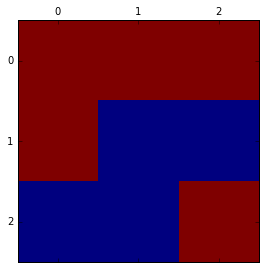

In [12]:
MyFigure, MyAxes = plt.subplots(1,1,figsize=(fsx,fsy))
MyAxes.matshow(MyGrid['State'])
MyFigure
repr(MyGrid['State'])
print(MyGrid['State'])